TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

**Overview **

In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

**Dataset**

The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:

•	Text: The content of the blog post. Column name: Data

•	Category: The category to which the blog post belongs. Column name: Labels
Tasks

1. Data Exploration and Preprocessing

•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.


•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

2. Naive Bayes Model for Text Classification

•	Split the data into training and test sets.

•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

•	Train the model on the training set and make predictions on the test set.

3. Sentiment Analysis

•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.

•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

•	Examine the distribution of sentiments across different categories and summarize your findings.

4. Evaluation

•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

•	Discuss the performance of the model and any challenges encountered during the classification process.

•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.
Submission Guidelines

•	Your submission should include a comprehensive report and the complete codebase.

•	Your code should be well-documented and include comments explaining the major steps.
Evaluation Criteria

•	Correct implementation of data preprocessing and feature extraction.

•	Accuracy and robustness of the Naive Bayes classification model.

•	Depth and insightfulness of the sentiment analysis.

•	Clarity and thoroughness of the evaluation
and discussion sections.

•	Overall quality and organization of the report and code.




1. Data Exploration and Preprocessing

In [3]:
#load dataset
import pandas as pd
df = pd.read_csv("/content/blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
df.shape

(2000, 2)

In [10]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [7]:
df.isnull()

,Data,Labels
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1995,False,False
1996,False,False
1997,False,False
1998,False,False


In [8]:
df.isnull().sum()

,0
Data,0
Labels,0


In [12]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- Load Data ---
df = pd.read_csv("blogs.csv")

print(df.shape)
print(df.head())
print(df['Labels'].value_counts())

# --- Text Preprocessing Function ---
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\[.*?\]', '', text)  # remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove links
    text = re.sub(r'<.*?>+', '', text)  # remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # remove digits
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['Clean_Data'] = df['Data'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(2000, 2)
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politi



2. Naive Bayes Model for Text Classification
We’ll use Multinomial Naive Bayes since it works well with TF-IDF and count-based features.


In [13]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Clean_Data']).toarray()
y = df['Labels']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)


3. Sentiment Analysis
You can use TextBlob for quick sentiment scoring.



/tmp/ipython-input-3523508837.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


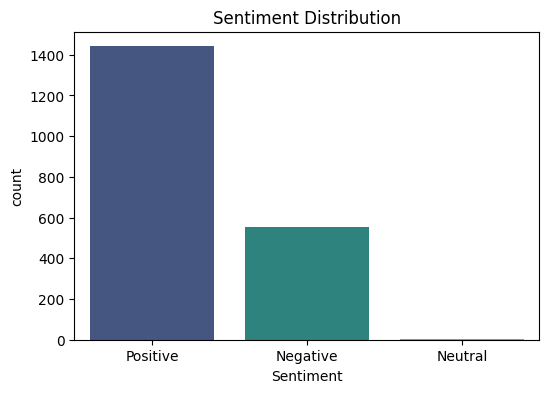

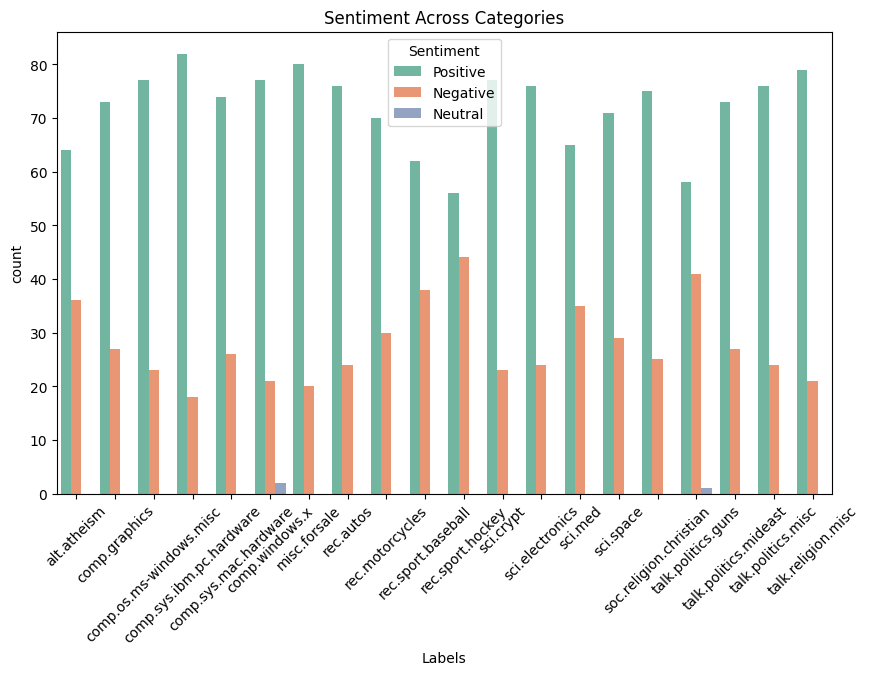

In [14]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Clean_Data'].apply(get_sentiment)

# Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

# Sentiment by Category
plt.figure(figsize=(10,6))
sns.countplot(x='Labels', hue='Sentiment', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title("Sentiment Across Categories")
plt.show()


4. Evaluation
Evaluate classification performance using accuracy, precision, recall, and F1-score.

Accuracy: 0.8275
Precision: 0.841154082010032
Recall: 0.8275
F1 Score: 0.8197017983491142

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.89      0.64        18
           comp.graphics       0.71      0.83      0.77        18
 comp.os.ms-windows.misc       0.78      0.82      0.80        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.87      0.80      0.83        25
            misc.forsale       1.00      0.67      0.80        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.82      1.00      0.90        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      0.95      0.90        19
         sci.electronics  

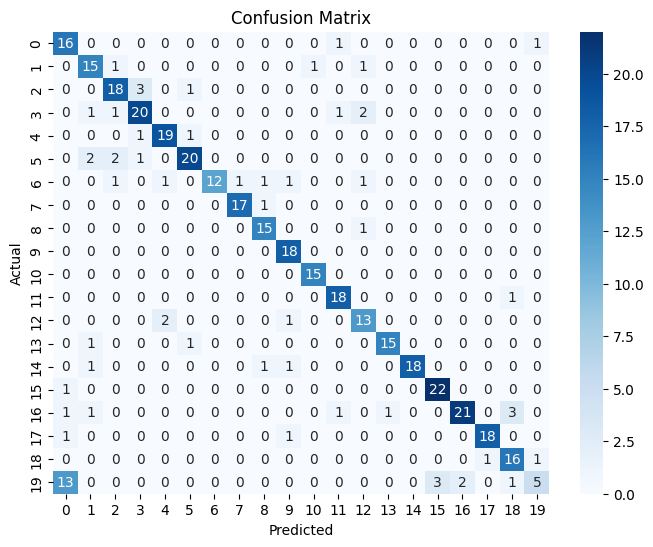

In [15]:
# Accuracy Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


5. Report Writing Pointers

Introduction:

 Explain what Naive Bayes is and why it’s suitable for text classification.


EDA: Show word frequency plots, category distribution, sentiment distribution.


Preprocessing: Describe steps clearly (lowercasing, stopword removal, TF-IDF).

Model: Explain Naive Bayes working briefly.

Results: Include metrics table and visualizations.

Discussion: Highlight which categories performed best/worst, challenges, and possible improvements.

Conclusion: Summarize findings from both classification and sentiment analysis

